In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv("Worldbank_GDP_Population.csv")
data.head()

,Country Name,year,gdp,population
0,Aruba,2016,2.584464e+09,104822.0
1,Afghanistan,2016,1.946902e+10,34656032.0
2,Angola,2016,9.533720e+10,28813463.0
3,Albania,2016,1.188368e+10,2876101.0
4,Andorra,2016,2.877312e+09,77281.0


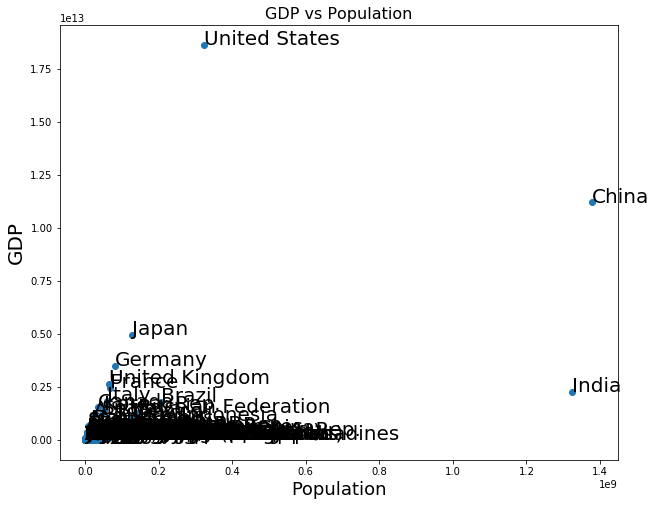

In [5]:
x = list(data["population"])
y = list(data["gdp"])
text = data["Country Name"]

fig, ax = plt.subplots(figsize =(10,8))
ax.scatter(x,y)
plt.title("GDP vs Population", fontsize=16)
plt.xlabel("Population",fontsize = 18)
plt.ylabel("GDP",fontsize=20)
for i,txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]),fontsize = 20)

In [7]:
df_no_large = (data["Country Name"] !="United States")& (data['Country Name'] != 'India') & (data['Country Name'] != 'China')
df_no_large[:5]

0    True
1    True
2    True
3    True
4    True
Name: Country Name, dtype: bool

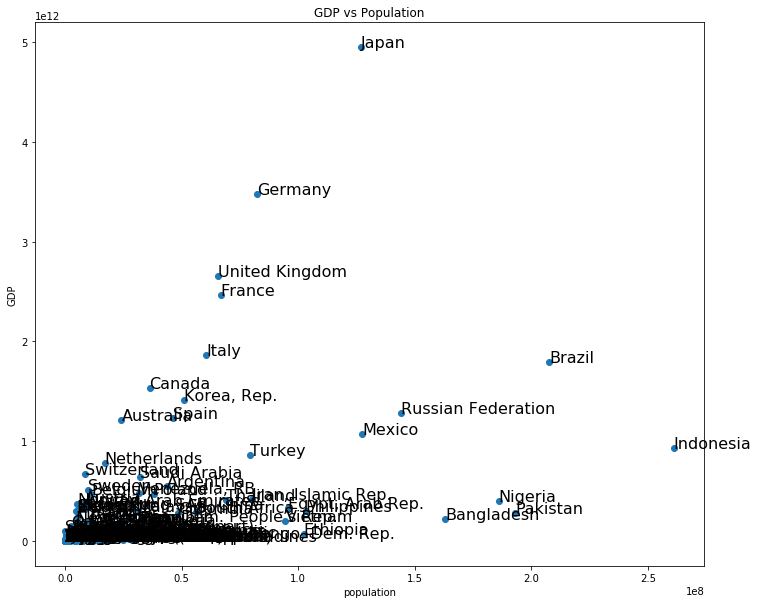

In [8]:
x = list(data[df_no_large]['population'])
y = list(data[df_no_large]['gdp'])
text = data[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize =(12,10))
ax.scatter(x,y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]),fontsize=16)

[[  6.54170378e+12]]


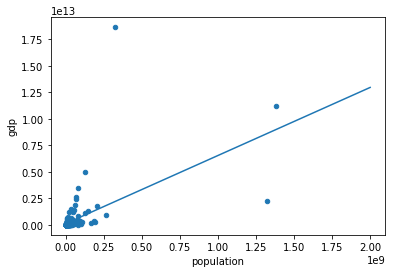

In [10]:
from sklearn.linear_model import LinearRegression

# fit a linear regression model on the population and gdp data
model = LinearRegression()
model.fit(data['population'].values.reshape(-1, 1), data['gdp'].values.reshape(-1, 1))

# plot the data along with predictions from the linear regression model
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

data.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions)
print(model.predict(1000000000))

[[  5.25824554e+12]]


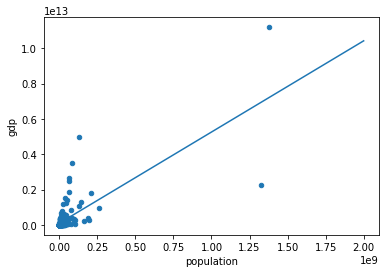

In [11]:
# Remove the United States to see what happens with the linear regression model
data[data['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(data[data['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          data[data['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)
print(model.predict(1000000000))